In [1]:

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import torchvision
import numpy as np
from visualize import plot_misclassified_images,losses_plot,accuracy_plot,show_images
from backpropagation import train, test
from utils import print_summary
from dataset import get_loader
from model import cnn_norm

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4471),(0.2469, 0.2433, 0.2615))])

batch_size = 128

trainloader, testloader,sampleloader=get_loader(transform, transform, batch_size=batch_size, use_cuda=True)

100%|██████████| 170498071/170498071 [00:13<00:00, 13095445.58it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


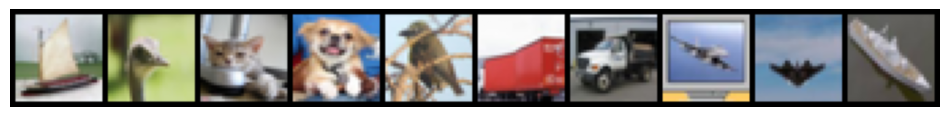

  ship        bird         cat         dog        bird       truck       truck       plane       plane        ship


In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
show_images(sampleloader,classes)

In [6]:
train_losses = {"BN":[],"GN":[],"LN":[]}
test_losses = {"BN":[],"GN":[],"LN":[]}
train_acc = {"BN":[],"GN":[],"LN":[]}
test_acc = {"BN":[],"GN":[],"LN":[]}

## Group Normalization

In [7]:
model_GN = cnn_norm(use_group_norm=True).to(device)
# Print the model summary
print_summary(model_GN, input_size=(3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
              ReLU-2           [-1, 16, 30, 30]               0
       BatchNorm2d-3           [-1, 16, 30, 30]              32
           Dropout-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 16, 28, 28]           2,304
              ReLU-6           [-1, 16, 28, 28]               0
       BatchNorm2d-7           [-1, 16, 28, 28]              32
           Dropout-8           [-1, 16, 28, 28]               0
            Conv2d-9           [-1, 24, 28, 28]             384
        MaxPool2d-10           [-1, 24, 14, 14]               0
           Conv2d-11           [-1, 24, 14, 14]           5,184
             ReLU-12           [-1, 24, 14, 14]               0
      BatchNorm2d-13           [-1, 24, 14, 14]              48
          Dropout-14           [-1, 24,

### Training and Testing-Group Normalization

In [8]:
optimizer = optim.SGD(model_GN.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc,train_losses=train(model_GN, device, trainloader, optimizer, epoch,train_acc,train_losses,runName='GN')
    test_acc,test_losses,test_loss=test(model_GN, device, testloader,test_acc,test_losses,runName='GN')

EPOCH: 0


Loss=1.2790114879608154 Batch_id=390 Accuracy=42.14: 100%|██████████| 391/391 [00:18<00:00, 20.74it/s]



Test set: Average loss: 1.4521, Accuracy: 4932/10000 (49.32%)

EPOCH: 1


Loss=1.1783502101898193 Batch_id=390 Accuracy=55.67: 100%|██████████| 391/391 [00:18<00:00, 21.07it/s]



Test set: Average loss: 1.1685, Accuracy: 5907/10000 (59.07%)

EPOCH: 2


Loss=1.158799409866333 Batch_id=390 Accuracy=61.20: 100%|██████████| 391/391 [00:17<00:00, 22.27it/s]



Test set: Average loss: 1.0871, Accuracy: 6166/10000 (61.66%)

EPOCH: 3


Loss=0.9454032778739929 Batch_id=390 Accuracy=64.53: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s]



Test set: Average loss: 0.9768, Accuracy: 6545/10000 (65.45%)

EPOCH: 4


Loss=1.005694031715393 Batch_id=390 Accuracy=67.52: 100%|██████████| 391/391 [00:17<00:00, 22.13it/s]



Test set: Average loss: 0.9137, Accuracy: 6793/10000 (67.93%)

EPOCH: 5


Loss=0.7645513415336609 Batch_id=390 Accuracy=69.39: 100%|██████████| 391/391 [00:17<00:00, 22.23it/s]



Test set: Average loss: 0.8620, Accuracy: 7012/10000 (70.12%)

EPOCH: 6


Loss=0.8404334783554077 Batch_id=390 Accuracy=70.74: 100%|██████████| 391/391 [00:18<00:00, 20.87it/s]



Test set: Average loss: 0.8269, Accuracy: 7124/10000 (71.24%)

EPOCH: 7


Loss=0.7481898069381714 Batch_id=390 Accuracy=72.08: 100%|██████████| 391/391 [00:17<00:00, 22.29it/s]



Test set: Average loss: 0.8405, Accuracy: 7102/10000 (71.02%)

EPOCH: 8


Loss=0.7408887147903442 Batch_id=390 Accuracy=73.03: 100%|██████████| 391/391 [00:18<00:00, 20.67it/s]



Test set: Average loss: 0.7698, Accuracy: 7312/10000 (73.12%)

EPOCH: 9


Loss=0.5213969945907593 Batch_id=390 Accuracy=74.00: 100%|██████████| 391/391 [00:17<00:00, 21.87it/s]



Test set: Average loss: 0.7965, Accuracy: 7214/10000 (72.14%)

EPOCH: 10


Loss=0.9384333491325378 Batch_id=390 Accuracy=75.02: 100%|██████████| 391/391 [00:17<00:00, 22.22it/s]



Test set: Average loss: 0.7683, Accuracy: 7381/10000 (73.81%)

EPOCH: 11


Loss=0.7178155183792114 Batch_id=390 Accuracy=75.23: 100%|██████████| 391/391 [00:18<00:00, 20.77it/s]



Test set: Average loss: 0.7147, Accuracy: 7522/10000 (75.22%)

EPOCH: 12


Loss=0.653652548789978 Batch_id=390 Accuracy=75.88: 100%|██████████| 391/391 [00:17<00:00, 22.14it/s]



Test set: Average loss: 0.7308, Accuracy: 7483/10000 (74.83%)

EPOCH: 13


Loss=0.788498044013977 Batch_id=390 Accuracy=76.33: 100%|██████████| 391/391 [00:18<00:00, 21.62it/s]



Test set: Average loss: 0.7429, Accuracy: 7445/10000 (74.45%)

EPOCH: 14


Loss=0.7369112372398376 Batch_id=390 Accuracy=76.29: 100%|██████████| 391/391 [00:18<00:00, 21.71it/s]



Test set: Average loss: 0.6902, Accuracy: 7608/10000 (76.08%)

EPOCH: 15


Loss=0.7923291921615601 Batch_id=390 Accuracy=76.93: 100%|██████████| 391/391 [00:17<00:00, 22.16it/s]



Test set: Average loss: 0.6821, Accuracy: 7672/10000 (76.72%)

EPOCH: 16


Loss=0.6870653629302979 Batch_id=390 Accuracy=77.29: 100%|██████████| 391/391 [00:18<00:00, 20.82it/s]



Test set: Average loss: 0.6684, Accuracy: 7749/10000 (77.49%)

EPOCH: 17


Loss=0.6175898909568787 Batch_id=390 Accuracy=77.83: 100%|██████████| 391/391 [00:17<00:00, 22.38it/s]



Test set: Average loss: 0.6674, Accuracy: 7691/10000 (76.91%)

EPOCH: 18


Loss=0.6190589666366577 Batch_id=390 Accuracy=77.96: 100%|██████████| 391/391 [00:18<00:00, 21.64it/s]



Test set: Average loss: 0.6692, Accuracy: 7713/10000 (77.13%)

EPOCH: 19


Loss=0.7292816042900085 Batch_id=390 Accuracy=78.58: 100%|██████████| 391/391 [00:18<00:00, 21.37it/s]



Test set: Average loss: 0.6611, Accuracy: 7760/10000 (77.60%)



### Misclassified Images- Group Normalization

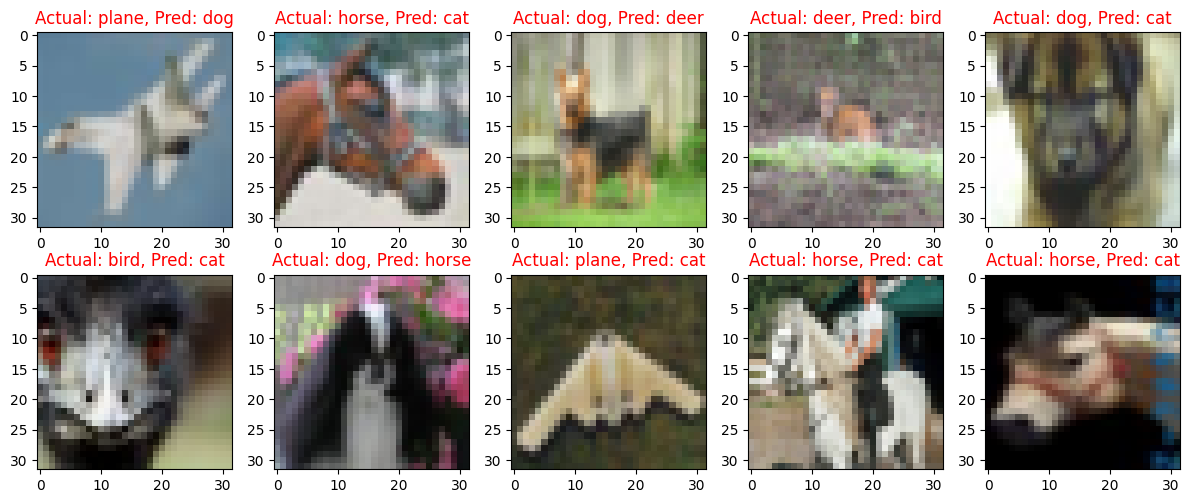

In [9]:
plot_misclassified_images(model_GN, testloader, classes, device)

## Layer Normalization

In [10]:
model_LN = cnn_norm(use_layer_norm=True).to(device)
# Print the model summary
print_summary(model_LN, input_size=(3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
              ReLU-2           [-1, 16, 30, 30]               0
       BatchNorm2d-3           [-1, 16, 30, 30]              32
           Dropout-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 16, 28, 28]           2,304
              ReLU-6           [-1, 16, 28, 28]               0
       BatchNorm2d-7           [-1, 16, 28, 28]              32
           Dropout-8           [-1, 16, 28, 28]               0
            Conv2d-9           [-1, 24, 28, 28]             384
        MaxPool2d-10           [-1, 24, 14, 14]               0
           Conv2d-11           [-1, 24, 14, 14]           5,184
             ReLU-12           [-1, 24, 14, 14]               0
      BatchNorm2d-13           [-1, 24, 14, 14]              48
          Dropout-14           [-1, 24,

### Training and Testing-Layer Normalization

In [11]:
optimizer = optim.SGD(model_LN.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc,train_losses=train(model_LN, device, trainloader, optimizer, epoch,train_acc,train_losses,runName='LN')
    test_acc,test_losses,test_loss=test(model_LN, device, testloader,test_acc,test_losses,runName='LN')

EPOCH: 0


Loss=1.4701076745986938 Batch_id=390 Accuracy=41.77: 100%|██████████| 391/391 [00:18<00:00, 21.56it/s]



Test set: Average loss: 1.7860, Accuracy: 4058/10000 (40.58%)

EPOCH: 1


Loss=1.3752868175506592 Batch_id=390 Accuracy=54.72: 100%|██████████| 391/391 [00:18<00:00, 20.82it/s]



Test set: Average loss: 1.2686, Accuracy: 5524/10000 (55.24%)

EPOCH: 2


Loss=1.1314189434051514 Batch_id=390 Accuracy=60.26: 100%|██████████| 391/391 [00:17<00:00, 22.14it/s]



Test set: Average loss: 1.1419, Accuracy: 6055/10000 (60.55%)

EPOCH: 3


Loss=1.0848475694656372 Batch_id=390 Accuracy=63.90: 100%|██████████| 391/391 [00:17<00:00, 22.11it/s]



Test set: Average loss: 1.0433, Accuracy: 6359/10000 (63.59%)

EPOCH: 4


Loss=0.8018442988395691 Batch_id=390 Accuracy=66.60: 100%|██████████| 391/391 [00:18<00:00, 20.81it/s]



Test set: Average loss: 0.9761, Accuracy: 6619/10000 (66.19%)

EPOCH: 5


Loss=1.0338987112045288 Batch_id=390 Accuracy=68.12: 100%|██████████| 391/391 [00:17<00:00, 22.17it/s]



Test set: Average loss: 0.9289, Accuracy: 6751/10000 (67.51%)

EPOCH: 6


Loss=0.932097315788269 Batch_id=390 Accuracy=69.96: 100%|██████████| 391/391 [00:18<00:00, 21.05it/s]



Test set: Average loss: 0.9831, Accuracy: 6601/10000 (66.01%)

EPOCH: 7


Loss=1.011947512626648 Batch_id=390 Accuracy=71.07: 100%|██████████| 391/391 [00:18<00:00, 21.67it/s]



Test set: Average loss: 0.8717, Accuracy: 6922/10000 (69.22%)

EPOCH: 8


Loss=0.8052938580513 Batch_id=390 Accuracy=72.22: 100%|██████████| 391/391 [00:17<00:00, 22.16it/s]



Test set: Average loss: 0.8843, Accuracy: 6954/10000 (69.54%)

EPOCH: 9


Loss=0.6525131464004517 Batch_id=390 Accuracy=72.99: 100%|██████████| 391/391 [00:18<00:00, 20.83it/s]



Test set: Average loss: 0.8096, Accuracy: 7192/10000 (71.92%)

EPOCH: 10


Loss=0.8605356216430664 Batch_id=390 Accuracy=73.82: 100%|██████████| 391/391 [00:17<00:00, 22.32it/s]



Test set: Average loss: 0.8382, Accuracy: 7107/10000 (71.07%)

EPOCH: 11


Loss=0.5949673056602478 Batch_id=390 Accuracy=74.73: 100%|██████████| 391/391 [00:17<00:00, 22.22it/s]



Test set: Average loss: 0.7850, Accuracy: 7283/10000 (72.83%)

EPOCH: 12


Loss=0.5632787346839905 Batch_id=390 Accuracy=75.49: 100%|██████████| 391/391 [00:18<00:00, 21.22it/s]



Test set: Average loss: 0.7934, Accuracy: 7267/10000 (72.67%)

EPOCH: 13


Loss=0.7493529915809631 Batch_id=390 Accuracy=75.68: 100%|██████████| 391/391 [00:17<00:00, 22.28it/s]



Test set: Average loss: 0.7589, Accuracy: 7349/10000 (73.49%)

EPOCH: 14


Loss=0.6037114262580872 Batch_id=390 Accuracy=76.20: 100%|██████████| 391/391 [00:18<00:00, 20.93it/s]



Test set: Average loss: 0.7565, Accuracy: 7394/10000 (73.94%)

EPOCH: 15


Loss=1.049095869064331 Batch_id=390 Accuracy=76.53: 100%|██████████| 391/391 [00:17<00:00, 22.18it/s]



Test set: Average loss: 0.7650, Accuracy: 7380/10000 (73.80%)

EPOCH: 16


Loss=0.6036568284034729 Batch_id=390 Accuracy=77.03: 100%|██████████| 391/391 [00:17<00:00, 22.04it/s]



Test set: Average loss: 0.7049, Accuracy: 7571/10000 (75.71%)

EPOCH: 17


Loss=0.8856413960456848 Batch_id=390 Accuracy=77.42: 100%|██████████| 391/391 [00:18<00:00, 20.92it/s]



Test set: Average loss: 0.7343, Accuracy: 7471/10000 (74.71%)

EPOCH: 18


Loss=0.4159409999847412 Batch_id=390 Accuracy=77.93: 100%|██████████| 391/391 [00:17<00:00, 22.16it/s]



Test set: Average loss: 0.6978, Accuracy: 7645/10000 (76.45%)

EPOCH: 19


Loss=0.565534770488739 Batch_id=390 Accuracy=78.07: 100%|██████████| 391/391 [00:18<00:00, 20.81it/s]



Test set: Average loss: 0.7014, Accuracy: 7593/10000 (75.93%)



### Misclassified Images- Layer Normalization

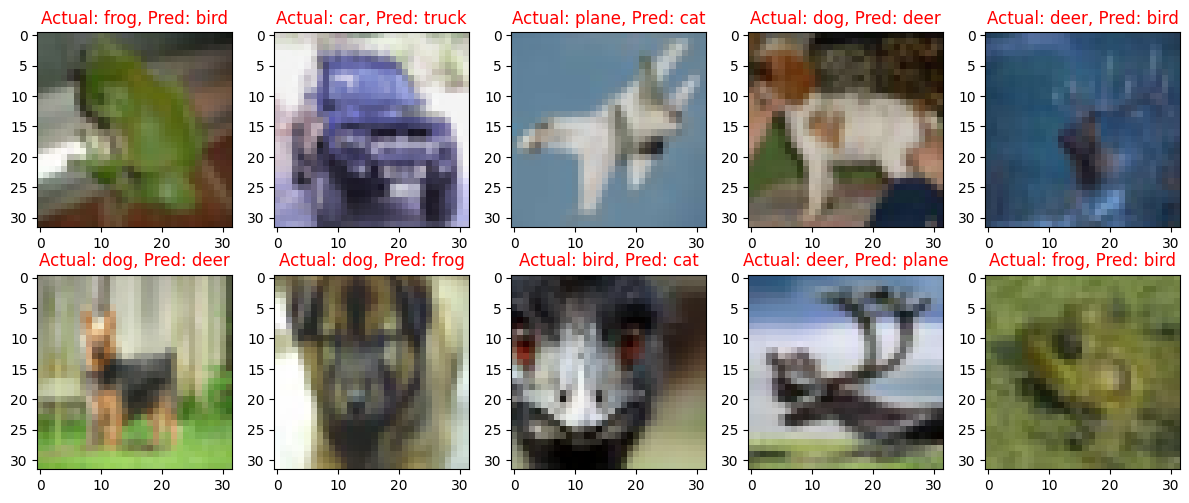

In [12]:
plot_misclassified_images(model_LN, testloader, classes, device)

## Batch Normalization

In [13]:
model_BN = cnn_norm(use_batch_norm=True).to(device)
# Print the model summary
print_summary(model_BN, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
              ReLU-2           [-1, 16, 30, 30]               0
       BatchNorm2d-3           [-1, 16, 30, 30]              32
           Dropout-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 16, 28, 28]           2,304
              ReLU-6           [-1, 16, 28, 28]               0
       BatchNorm2d-7           [-1, 16, 28, 28]              32
           Dropout-8           [-1, 16, 28, 28]               0
            Conv2d-9           [-1, 24, 28, 28]             384
        MaxPool2d-10           [-1, 24, 14, 14]               0
           Conv2d-11           [-1, 24, 14, 14]           5,184
             ReLU-12           [-1, 24, 14, 14]               0
      BatchNorm2d-13           [-1, 24, 14, 14]              48
          Dropout-14           [-1, 24,

### Training and Testing-Batch Normalization

In [14]:
optimizer = optim.SGD(model_BN.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc,train_losses=train(model_BN, device, trainloader, optimizer, epoch,train_acc,train_losses,runName='BN')
    test_acc,test_losses,test_loss=test(model_BN, device, testloader,test_acc,test_losses,runName='BN')

EPOCH: 0


Loss=1.4545667171478271 Batch_id=390 Accuracy=41.45: 100%|██████████| 391/391 [00:18<00:00, 20.91it/s]



Test set: Average loss: 1.5449, Accuracy: 4415/10000 (44.15%)

EPOCH: 1


Loss=1.0681406259536743 Batch_id=390 Accuracy=55.01: 100%|██████████| 391/391 [00:17<00:00, 22.18it/s]



Test set: Average loss: 1.2703, Accuracy: 5578/10000 (55.78%)

EPOCH: 2


Loss=1.0192954540252686 Batch_id=390 Accuracy=60.82: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]



Test set: Average loss: 1.0634, Accuracy: 6194/10000 (61.94%)

EPOCH: 3


Loss=1.0217626094818115 Batch_id=390 Accuracy=64.39: 100%|██████████| 391/391 [00:18<00:00, 20.80it/s]



Test set: Average loss: 1.0721, Accuracy: 6250/10000 (62.50%)

EPOCH: 4


Loss=0.9692484140396118 Batch_id=390 Accuracy=66.98: 100%|██████████| 391/391 [00:17<00:00, 22.35it/s]



Test set: Average loss: 0.9185, Accuracy: 6788/10000 (67.88%)

EPOCH: 5


Loss=0.7636894583702087 Batch_id=390 Accuracy=69.09: 100%|██████████| 391/391 [00:18<00:00, 21.33it/s]



Test set: Average loss: 0.8537, Accuracy: 7008/10000 (70.08%)

EPOCH: 6


Loss=1.1291850805282593 Batch_id=390 Accuracy=70.51: 100%|██████████| 391/391 [00:17<00:00, 22.25it/s]



Test set: Average loss: 0.8141, Accuracy: 7115/10000 (71.15%)

EPOCH: 7


Loss=0.7589906454086304 Batch_id=390 Accuracy=72.23: 100%|██████████| 391/391 [00:17<00:00, 22.20it/s]



Test set: Average loss: 0.7813, Accuracy: 7301/10000 (73.01%)

EPOCH: 8


Loss=0.6521061658859253 Batch_id=390 Accuracy=72.75: 100%|██████████| 391/391 [00:18<00:00, 20.98it/s]



Test set: Average loss: 0.7902, Accuracy: 7212/10000 (72.12%)

EPOCH: 9


Loss=0.7241032719612122 Batch_id=390 Accuracy=73.48: 100%|██████████| 391/391 [00:17<00:00, 22.29it/s]



Test set: Average loss: 0.7617, Accuracy: 7365/10000 (73.65%)

EPOCH: 10


Loss=0.8043212890625 Batch_id=390 Accuracy=74.18: 100%|██████████| 391/391 [00:17<00:00, 21.85it/s]



Test set: Average loss: 0.7225, Accuracy: 7507/10000 (75.07%)

EPOCH: 11


Loss=0.7652499675750732 Batch_id=390 Accuracy=74.91: 100%|██████████| 391/391 [00:17<00:00, 21.99it/s]



Test set: Average loss: 0.7372, Accuracy: 7454/10000 (74.54%)

EPOCH: 12


Loss=0.7766750454902649 Batch_id=390 Accuracy=75.47: 100%|██████████| 391/391 [00:17<00:00, 22.30it/s]



Test set: Average loss: 0.7119, Accuracy: 7544/10000 (75.44%)

EPOCH: 13


Loss=0.7100093960762024 Batch_id=390 Accuracy=75.96: 100%|██████████| 391/391 [00:18<00:00, 20.99it/s]



Test set: Average loss: 0.7099, Accuracy: 7534/10000 (75.34%)

EPOCH: 14


Loss=0.7247472405433655 Batch_id=390 Accuracy=76.24: 100%|██████████| 391/391 [00:17<00:00, 22.15it/s]



Test set: Average loss: 0.7105, Accuracy: 7528/10000 (75.28%)

EPOCH: 15


Loss=0.654797375202179 Batch_id=390 Accuracy=76.89: 100%|██████████| 391/391 [00:17<00:00, 21.89it/s]



Test set: Average loss: 0.7025, Accuracy: 7590/10000 (75.90%)

EPOCH: 16


Loss=0.8721760511398315 Batch_id=390 Accuracy=76.99: 100%|██████████| 391/391 [00:18<00:00, 21.07it/s]



Test set: Average loss: 0.6919, Accuracy: 7623/10000 (76.23%)

EPOCH: 17


Loss=0.7437052130699158 Batch_id=390 Accuracy=77.46: 100%|██████████| 391/391 [00:17<00:00, 22.44it/s]



Test set: Average loss: 0.6708, Accuracy: 7677/10000 (76.77%)

EPOCH: 18


Loss=0.6331244707107544 Batch_id=390 Accuracy=77.66: 100%|██████████| 391/391 [00:18<00:00, 20.92it/s]



Test set: Average loss: 0.6778, Accuracy: 7696/10000 (76.96%)

EPOCH: 19


Loss=0.620276689529419 Batch_id=390 Accuracy=78.18: 100%|██████████| 391/391 [00:17<00:00, 22.29it/s]



Test set: Average loss: 0.6828, Accuracy: 7667/10000 (76.67%)



### Misclassified Images- Batch Normalization

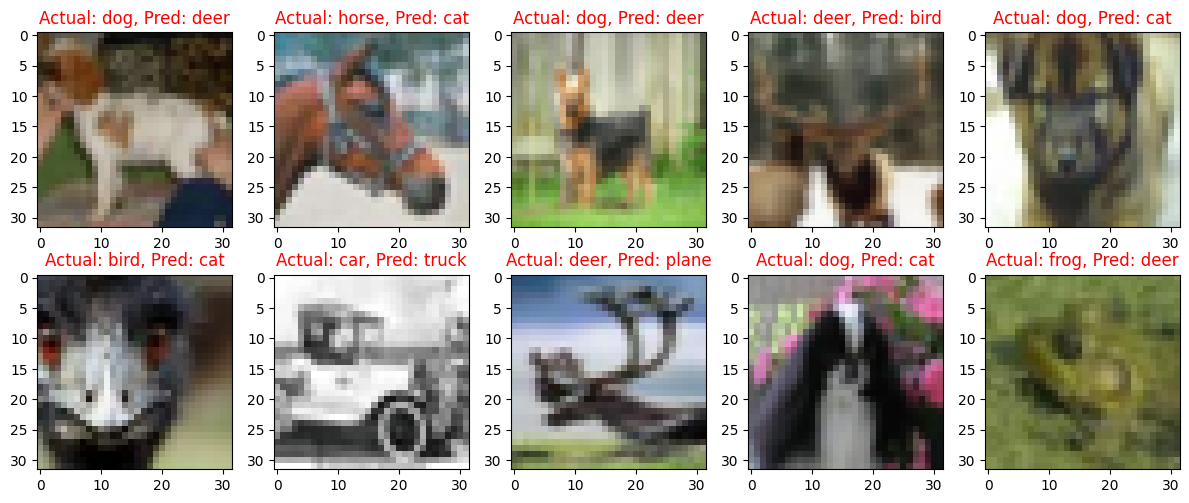

In [15]:
plot_misclassified_images(model_BN, testloader, classes, device)

### Loss Plot

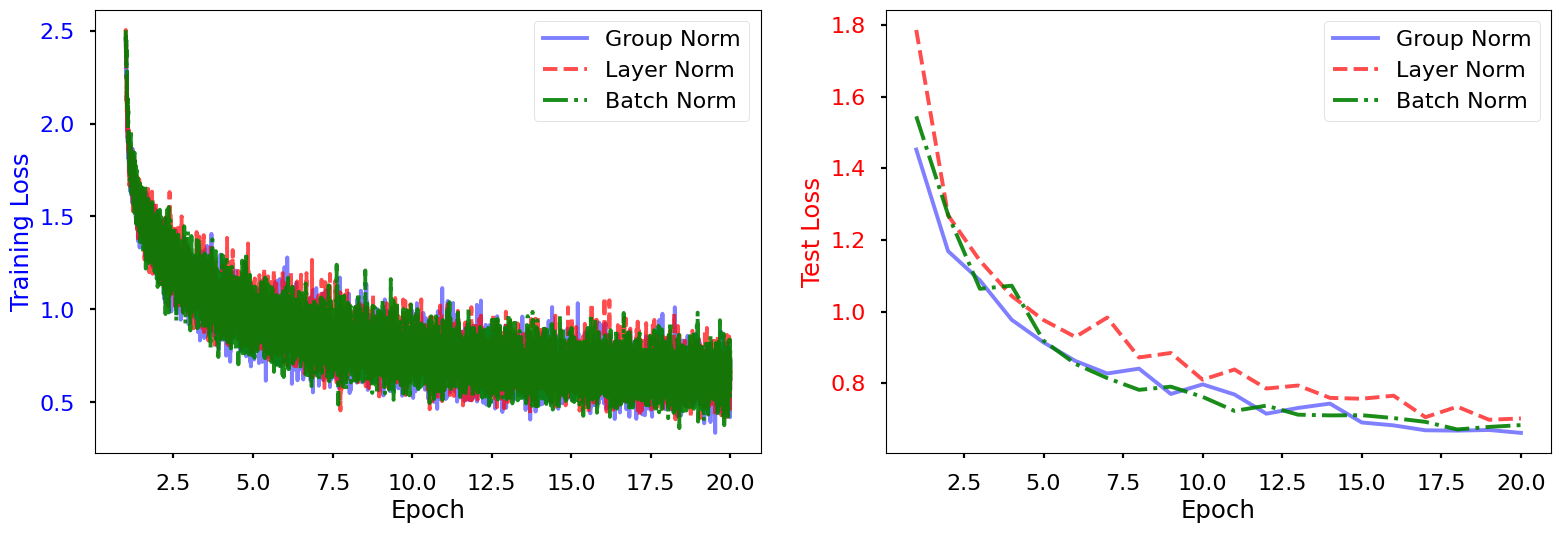

In [16]:
losses_plot(train_losses,test_losses)

### Accuracy Plot

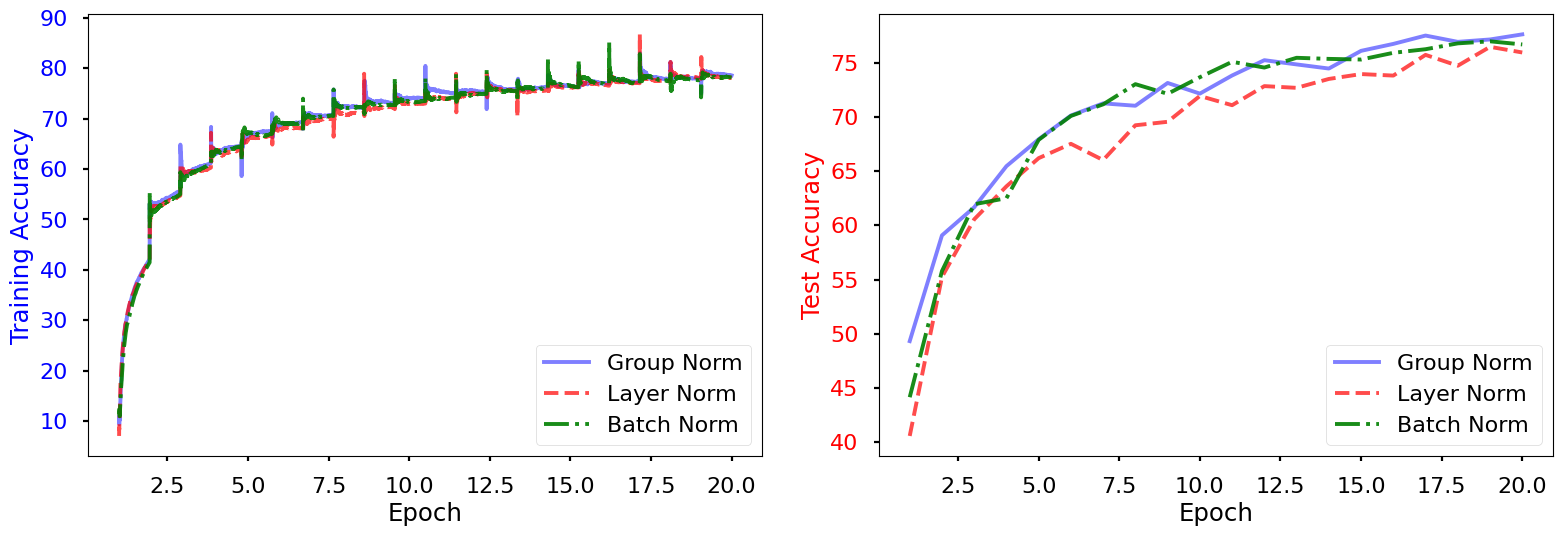

In [17]:
accuracy_plot(train_acc,test_acc)